# Part 2 - Question 5
Q. Are specific quality descriptors of text-based reviews such as 'enthusiastic', 'disappointed', and others, strongly associated with rating levels?


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from gensim.models import Word2Vec, KeyedVectors
import string
from collections import Counter, defaultdict
import seaborn as sns
import spacy

# Hair Dryer

In [14]:
hair_dryer_df = pd.read_csv('Problem_C_Data/hair_dryer.tsv', sep='\t')
hair_dryer_df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,5,0,0,N,Y,Works great,Works great!,8/31/2015
1,US,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,Beauty,4,0,0,N,Y,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po...",8/31/2015
2,US,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,Beauty,5,0,1,N,Y,Five Stars,Love this dryer!,8/31/2015
3,US,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,Beauty,5,0,0,N,Y,Five Stars,styling hair in style,8/31/2015
4,US,107098,R35BHQJHXXJD59,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,4,0,0,N,N,I think's great. The cord length is perfect,I just got this last week. I think's great. Th...,8/31/2015


In [18]:
# Merge review_headline and review_body columns
hair_dryer_df['review_text'] = hair_dryer_df['review_headline'].fillna('') + ' ' + hair_dryer_df['review_body'].fillna('')

In [19]:
hair_dryer_df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,cleaned_tokens,review_text
0,US,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,5,0,0,N,Y,Works great,Works great!,8/31/2015,"[works, great]",Works great Works great!
1,US,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,Beauty,4,0,0,N,Y,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po...",8/31/2015,"[dries, hair, faster, bigger, powerful, models...",I love travel blow dryers because they are eas...
2,US,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,Beauty,5,0,1,N,Y,Five Stars,Love this dryer!,8/31/2015,"[love, dryer]",Five Stars Love this dryer!
3,US,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,Beauty,5,0,0,N,Y,Five Stars,styling hair in style,8/31/2015,"[styling, hair, style]",Five Stars styling hair in style
4,US,107098,R35BHQJHXXJD59,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,4,0,0,N,N,I think's great. The cord length is perfect,I just got this last week. I think's great. Th...,8/31/2015,"[got, last, week, think, 's, great, cord, leng...",I think's great. The cord length is perfect I ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11465,US,35599734,R2O50YNP83CG34,B000065DJY,919751065,revlon 1875w volumizing hair dryer,Beauty,5,14,18,N,N,great hair!,"I just purchased this dryer, and I really like...",8/21/2002,"[purchased, dryer, really, like, way, hair, lo...","great hair! I just purchased this dryer, and I..."
11466,US,43977044,R2JQPUYU65C4QD,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,1,26,32,N,N,Disappointment with dryer,I purchased it because it was supposed to be q...,8/13/2002,"[purchased, supposed, quiet, 's, every, bit, l...",Disappointment with dryer I purchased it becau...
11467,US,37733836,R3GO6L5PWBS0IW,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,5,4,4,N,Y,The best dryer!!!,"I love this dryer not only is it QUIET, it rea...",7/13/2002,"[love, dryer, quiet, really, make, hair, shiny...",The best dryer!!! I love this dryer not only i...
11468,US,38947355,R3JMGN42OJCL97,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,5,78,87,N,N,Excellent for fine/limp hair,This hairdryer far exceeded my expection for<B...,4/20/2002,"[hairdryer, far, exceeded, expection, br, volu...",Excellent for fine/limp hair This hairdryer fa...


In [45]:
# Get the 10 most common words for each rating level
punctuation = set(string.punctuation)

# Common words that don't make sense to me
nonsense_words = {"n't", "one", "br", "'s", "br", "would"}

word_freq_by_rating = {}
for rating in range(1, 6):
    reviews_by_rating = hair_dryer_df[hair_dryer_df['star_rating'] == rating]['review_text']
    
    word_freq = Counter()
    for review in reviews_by_rating:
        tokens = word_tokenize(review.lower())
        tokens = [token for token in tokens if token not in punctuation and token not in stop_words and token not in nonsense_words]
        word_freq.update(tokens)
    
    word_freq_by_rating[rating] = word_freq

num_common_words = 10 
for rating, word_freq in word_freq_by_rating.items():
    print(f"Rating {rating} Stars:")
    common_words = word_freq.most_common(num_common_words)
    for word, freq in common_words:
        print(f"{word}: {freq}")
    print()

Rating 1 Stars:
dryer: 1190
hair: 1020
product: 341
months: 319
use: 305
time: 250
buy: 246
used: 240
bought: 228
like: 216

Rating 2 Stars:
dryer: 780
hair: 727
use: 189
like: 179
months: 173
hot: 172
product: 148
cord: 139
dry: 138
get: 134

Rating 3 Stars:
hair: 1236
dryer: 1147
like: 335
good: 287
use: 281
cord: 257
dry: 234
get: 216
great: 214
well: 202

Rating 4 Stars:
hair: 2630
dryer: 2450
great: 964
good: 942
like: 702
works: 618
use: 599
well: 469
cord: 440
product: 437

Rating 5 Stars:
hair: 9091
dryer: 7648
great: 3592
love: 2545
use: 1509
product: 1492
good: 1486
like: 1360
works: 1357
five: 1337

[('hair', 9091), ('dryer', 7648), ('great', 3592), ('love', 2545), ('use', 1509), ('product', 1492), ('good', 1486), ('like', 1360), ('works', 1357), ('five', 1337)]


In [92]:
# Load spaCy's medium English model
nlp = spacy.load('en_core_web_md')

# Define your descriptors
common_descriptors = {
    'poor', 'terrible', 'disappointing',
    'average', 'mediocre', 'okay',
    'satisfactory', 'good', 'acceptable',
    'great', 'excellent', 'awesome',
    'amazing', 'fantastic', 'superb', 'enthusiastic'
}

# Convert descriptors into spaCy document objects for vector comparison
descriptor_tokens = {desc: nlp(desc) for desc in common_descriptors}

def analyze_descriptors(dataframe, descriptor_tokens, similarity_threshold=0.8):
    descriptor_count = {rating: {desc: 0 for desc in descriptor_tokens} for rating in range(1, 6)}
    
    for index, row in dataframe.iterrows():
        review_doc = nlp(row['review_text'].lower())
        star_rating = row['star_rating']
        
        for desc, desc_token in descriptor_tokens.items():
            # Check each token in the review
            for token in review_doc:
                # Calculate similarity and check against the threshold
                if token.has_vector and desc_token.has_vector and token.similarity(desc_token) > similarity_threshold:
                    descriptor_count[star_rating][desc] += 1
                    break  # Assuming you count each descriptor only once per review
    
    descriptor_df = pd.DataFrame(descriptor_count)
    
    return descriptor_df

descriptor_df = analyze_descriptors(hair_dryer_df, descriptor_tokens)
print(descriptor_df)

                 1    2    3    4     5
terrible        55   15   13   13    12
great           99  108  166  694  2619
okay             8   11   67   19    24
fantastic      116  115  184  782  3340
amazing         17   14   23   81   746
superb           8    3    9   70   508
disappointing  138   86   76   35    74
poor            28   16    7    4     6
mediocre         7    8   35   48    29
average          1    3   17   19    37
awesome         10    9   18   55   580
excellent        8    3    9   70   508
good           124  102  212  666  1182
acceptable      10    5   10   33    81
satisfactory     2    1    2    6     6
enthusiastic     0    0    0    0     2


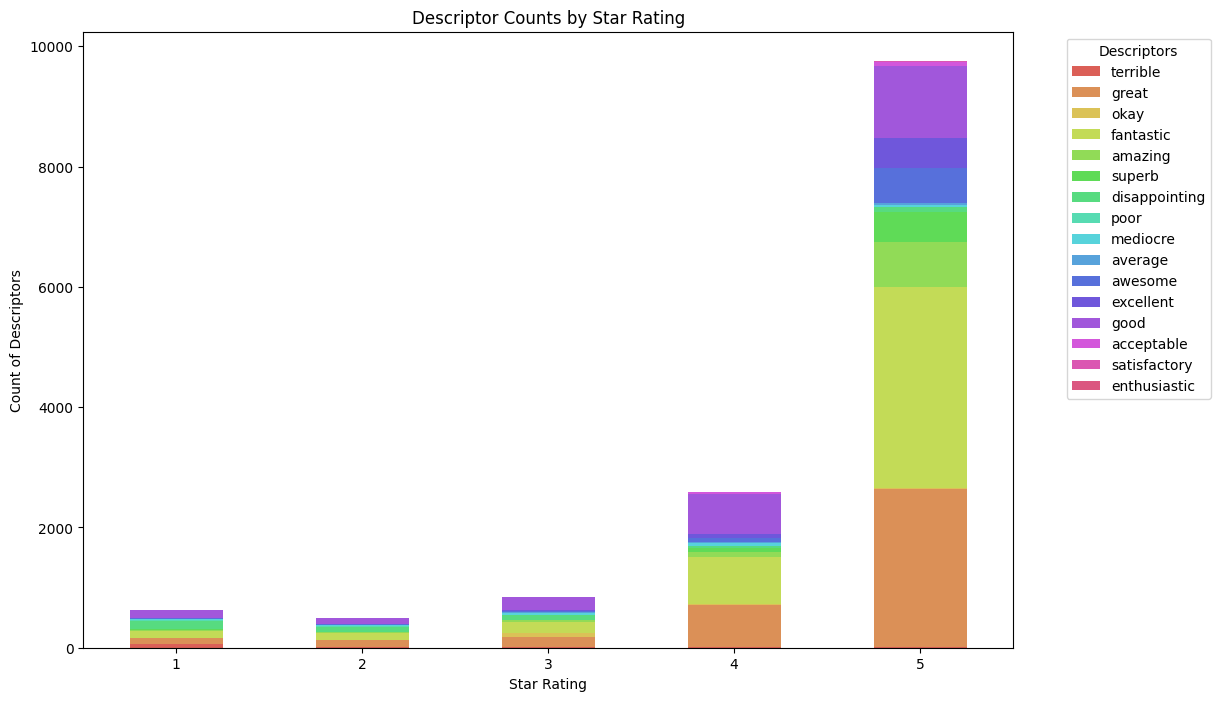

In [93]:
colors = sns.color_palette('hls', n_colors=len(common_descriptors))  # 'husl' is colorful, but you can choose any other

descriptor_df_transposed = descriptor_df.fillna(0).transpose()

fig, ax = plt.subplots(figsize=(12, 8))
descriptor_df_transposed.plot(kind='bar', stacked=True, ax=ax, color=colors)
ax.set_title('Descriptor Counts by Star Rating')
ax.set_xlabel('Star Rating')
ax.set_ylabel('Count of Descriptors')
ax.legend(title='Descriptors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# def glove_to_word2vec(glove_input_file, word2vec_output_file):
#     """Convert GloVe file format to Word2Vec file format."""
#     from gensim.scripts.glove2word2vec import glove2word2vec
#     glove2word2vec(glove_input_file, word2vec_output_file)

# glove_input_file = 'glove.6B.100d.txt'
# word2vec_output_file = 'glove.6B.100d.word2vec.txt'
# glove_to_word2vec(glove_input_file, word2vec_output_file)


In [77]:
model = KeyedVectors.load_word2vec_format('glove.6B.100d.word2vec.txt', binary=False)

def descriptor_similarity_aggregated(dataframe, descriptors, model):
    results_list = []
    
    # Group by star rating
    grouped = dataframe.groupby('star_rating')
    
    for name, group in grouped:
        group_results = {'star_rating': name}
        for descriptor in descriptors:
            total_similarity = 0
            count = 0
            for index, row in group.iterrows():
                review_tokens = word_tokenize(row['review_text'].lower())
                if not review_tokens:
                    continue
                review_vectors = [model[word] for word in review_tokens if word in model]
                if not review_vectors:
                    continue
                review_vector = np.mean(review_vectors, axis=0)
                if descriptor in model:
                    descriptor_vector = model[descriptor]
                    similarity = np.dot(review_vector, descriptor_vector) / (np.linalg.norm(review_vector) * np.linalg.norm(descriptor_vector))
                    total_similarity += similarity
                    count += 1
            group_results[descriptor] = total_similarity / count if count > 0 else np.nan
        results_list.append(group_results)

    results = pd.DataFrame(results_list)
    return results

aggregated_results = descriptor_similarity_aggregated(hair_dryer_df, common_descriptors, model)
print(aggregated_results)

   star_rating  terrible     great      okay  fantastic   amazing    superb  \
0            1  0.471528  0.715526  0.327083   0.448526  0.477067  0.344684   
1            2  0.467584  0.718430  0.326495   0.450433  0.478860  0.352748   
2            3  0.466650  0.720554  0.329543   0.456483  0.485480  0.358810   
3            4  0.466344  0.729211  0.324876   0.469204  0.498893  0.370660   
4            5  0.467792  0.731423  0.323565   0.483628  0.516531  0.378238   

   disappointing      poor  mediocre   average   awesome  excellent      good  \
0       0.432333  0.598393  0.275949  0.497344  0.359346   0.529867  0.800996   
1       0.433429  0.601011  0.282342  0.498712  0.358871   0.538911  0.805217   
2       0.433523  0.601600  0.288935  0.497673  0.364787   0.548824  0.809614   
3       0.428536  0.598565  0.293794  0.495906  0.373086   0.562656  0.815979   
4       0.420659  0.586285  0.298687  0.490553  0.387689   0.563368  0.813326   

   acceptable  satisfactory  enthusias

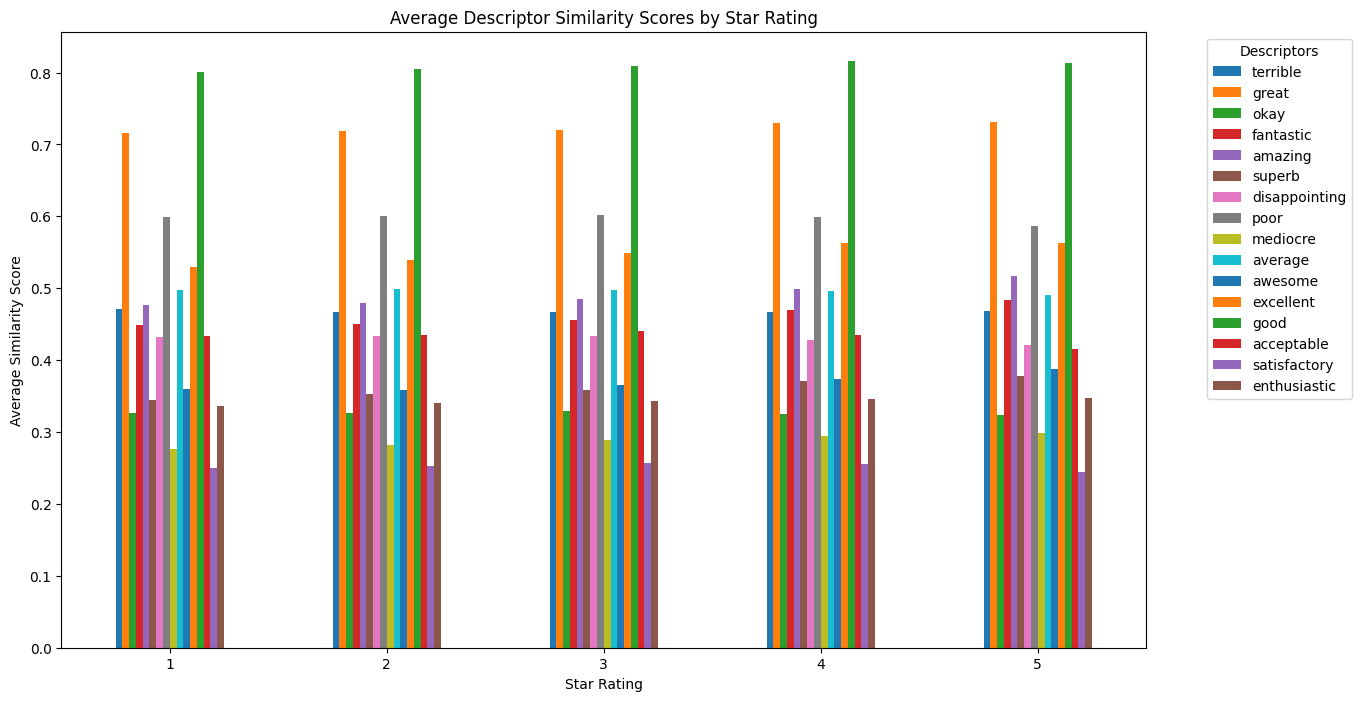

In [78]:
# Plotting the results
fig, ax = plt.subplots(figsize=(14, 8))
aggregated_results.set_index('star_rating').plot(kind='bar', ax=ax)
ax.set_title('Average Descriptor Similarity Scores by Star Rating')
ax.set_xlabel('Star Rating')
ax.set_ylabel('Average Similarity Score')
plt.xticks(rotation=0)
plt.legend(title='Descriptors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Pacifier

In [94]:
pacifier_df = pd.read_csv('Problem_C_Data/pacifier.tsv', sep='\t')
pacifier_df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,40626522,R1A3ZUBR8TSAKY,B00793CZAE,572944212,"mary meyer wubbanub plush pacifier, lamb",Baby,5,0,0,N,Y,Love this!,Perfect match for the Gund Huggybuddy I bought...,8/31/2015
1,US,16290022,RLJNYBK4FGBYX,B003PCYMP4,911821018,wubbanub lamb infant pacifier,Baby,5,0,0,N,Y,Love 💕,My little girl love this paci contraption!,8/31/2015
2,US,10216509,R26QCW75C4JDOK,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,Baby,5,0,0,N,Y,Five Stars,My son loves this one and will only sleep if h...,8/31/2015
3,US,114040,R2E7N0TVLUHUDR,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,Baby,5,0,0,N,Y,Five Stars,Perfect,8/31/2015
4,US,27971579,R1SO9VMCIGZX3U,B003PCYMP4,911821018,wubbanub lamb infant pacifier,Baby,5,0,0,N,Y,Five Stars,Amazing addition to the nursery!,8/31/2015


In [96]:
pacifier_df['review_text'] = pacifier_df['review_headline'].fillna('') + ' ' + pacifier_df['review_body'].fillna('')

In [97]:
# Convert descriptors into spaCy document objects for vector comparison
descriptor_tokens = {desc: nlp(desc) for desc in common_descriptors}

descriptor_pf = analyze_descriptors(pacifier_df, descriptor_tokens)
print(descriptor_df) 

                 1    2    3    4     5
terrible        55   15   13   13    12
great           99  108  166  694  2619
okay             8   11   67   19    24
fantastic      116  115  184  782  3340
amazing         17   14   23   81   746
superb           8    3    9   70   508
disappointing  138   86   76   35    74
poor            28   16    7    4     6
mediocre         7    8   35   48    29
average          1    3   17   19    37
awesome         10    9   18   55   580
excellent        8    3    9   70   508
good           124  102  212  666  1182
acceptable      10    5   10   33    81
satisfactory     2    1    2    6     6
enthusiastic     0    0    0    0     2


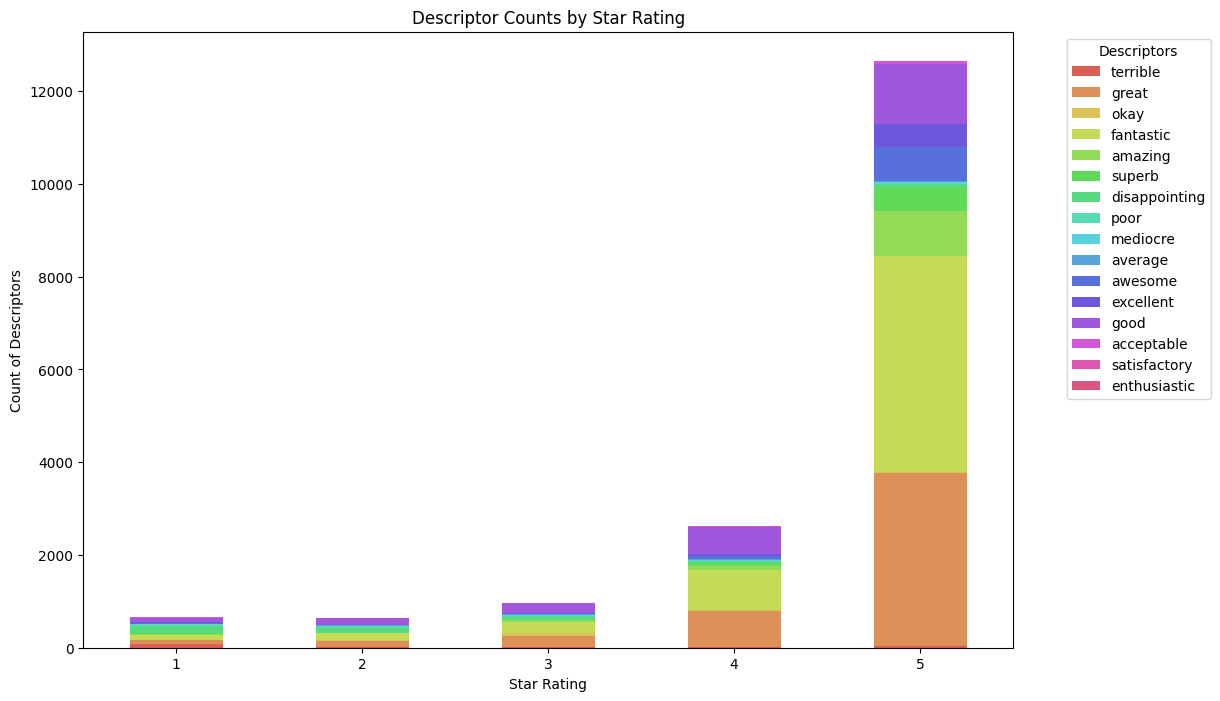

In [101]:
descriptor_pf_transposed = descriptor_pf.fillna(0).transpose()

# Plot with assigned colors
fig, ax = plt.subplots(figsize=(12, 8))
descriptor_pf_transposed.plot(kind='bar', stacked=True, ax=ax, color=colors)
ax.set_title('Descriptor Counts by Star Rating')
ax.set_xlabel('Star Rating')
ax.set_ylabel('Count of Descriptors')
ax.legend(title='Descriptors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

# Microwave

In [98]:
microwave_df = pd.read_csv('Problem_C_Data/microwave.tsv', sep='\t')
microwave_df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,21879631,RY52KZABZK8QF,B0052G14E8,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,1,0,0,N,Y,Do not recommend it. go use your money for som...,3 of the buttons stopped working after a month...,8/31/2015
1,US,14964566,R3GCOEV4HYZG2I,B0055UBB4O,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,5,0,0,N,Y,Looks as good as the picture,Didn't use it long so I can't attest to that b...,8/31/2015
2,US,13230389,R1V2OPPNL0QGCE,B0052G14E8,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,4,0,0,N,Y,Four Stars,"Very nice microwave, great price",8/31/2015
3,US,43655888,R9Q0QDTLKV567,B004ZU09QQ,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,3,0,1,N,Y,quiet,"Quiet, but does not seem like 1000 watt power.",8/31/2015
4,US,117794,R3DL7HYC3QTWNI,B005GSZB7I,827502283,"whirlpool stainless look countertop microwave,...",Major Appliances,4,0,0,N,Y,Four Stars,It's bigger than I thought.,8/31/2015


In [99]:
microwave_df['review_text'] = microwave_df['review_headline'].fillna('') + ' ' + microwave_df['review_body'].fillna('')

In [100]:
descriptor_mv = analyze_descriptors(microwave_df, descriptor_tokens)
print(descriptor_mv) 

                1   2   3    4    5
terrible       32   6   2    2    3
great          35  20  21   93  287
okay            2   2   5    5    2
fantastic      45  20  23  100  340
amazing        11   1   2    4   57
superb          6   0   4    7   52
disappointing  35  12   7    8    5
poor           27   8   1    2    1
mediocre        4   5   4    6    5
average         2   0   4    3    1
awesome         6   0   2    1   41
excellent       6   0   4    7   52
good           42  27  31  103  118
acceptable     10   3   2    6    5
satisfactory    1   1   2    1    0
enthusiastic    0   0   0    0    0


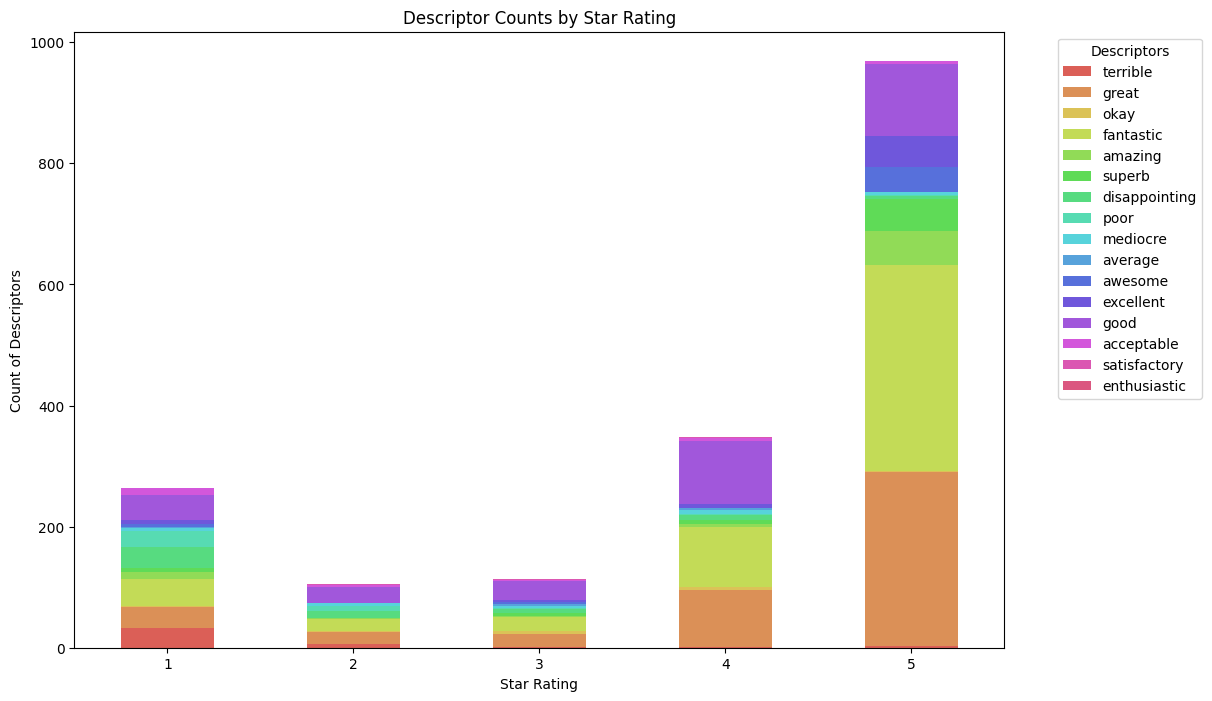

In [102]:
descriptor_mv_transposed = descriptor_mv.fillna(0).transpose()

# Plot with assigned colors
fig, ax = plt.subplots(figsize=(12, 8))
descriptor_mv_transposed.plot(kind='bar', stacked=True, ax=ax, color=colors)
ax.set_title('Descriptor Counts by Star Rating')
ax.set_xlabel('Star Rating')
ax.set_ylabel('Count of Descriptors')
ax.legend(title='Descriptors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()